MOUNT GDRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT

In [ ]:
 ##Kena guna tensorflow.keras (latest)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras import applications
import tensorflow as tf
from tqdm import tqdm 
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
import random
from shutil import copyfile
import os
import gc
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras import backend as K

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
#displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

INITIALIZE DIRECTORY

In [ ]:
##Directory
import os
print(os.listdir('/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All'))

['daisy', 'dandelion', 'hibiscus', 'rose', 'tulip', 'sunflower']


ASSIGN ARRAY

In [ ]:
X=[]
y=[]
IMG_SIZE=150
DAISY_DIR='/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All/daisy'
DANDI_DIR='/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All/dandelion'
HIBISCUS_DIR='/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All/hibiscus'
ROSE_DIR='/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All/rose'
SUNFLOWER_DIR='/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All/sunflower'
TULIP_DIR='/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All/tulip'

In [ ]:
##Assign label based on folder name s
def assigning_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assigning_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        y.append(str(label))

In [ ]:
#create training data
make_train_data('Daisy',DAISY_DIR)
make_train_data('Dandelion',DANDI_DIR)
make_train_data('Hibiscus',HIBISCUS_DIR)
make_train_data('Rose',ROSE_DIR)
make_train_data('Sunflower',SUNFLOWER_DIR)
make_train_data('Tulip',TULIP_DIR)
print(len(X))

100%|██████████| 758/758 [03:09<00:00,  3.99it/s]

4416


DISPLAY IMAGES

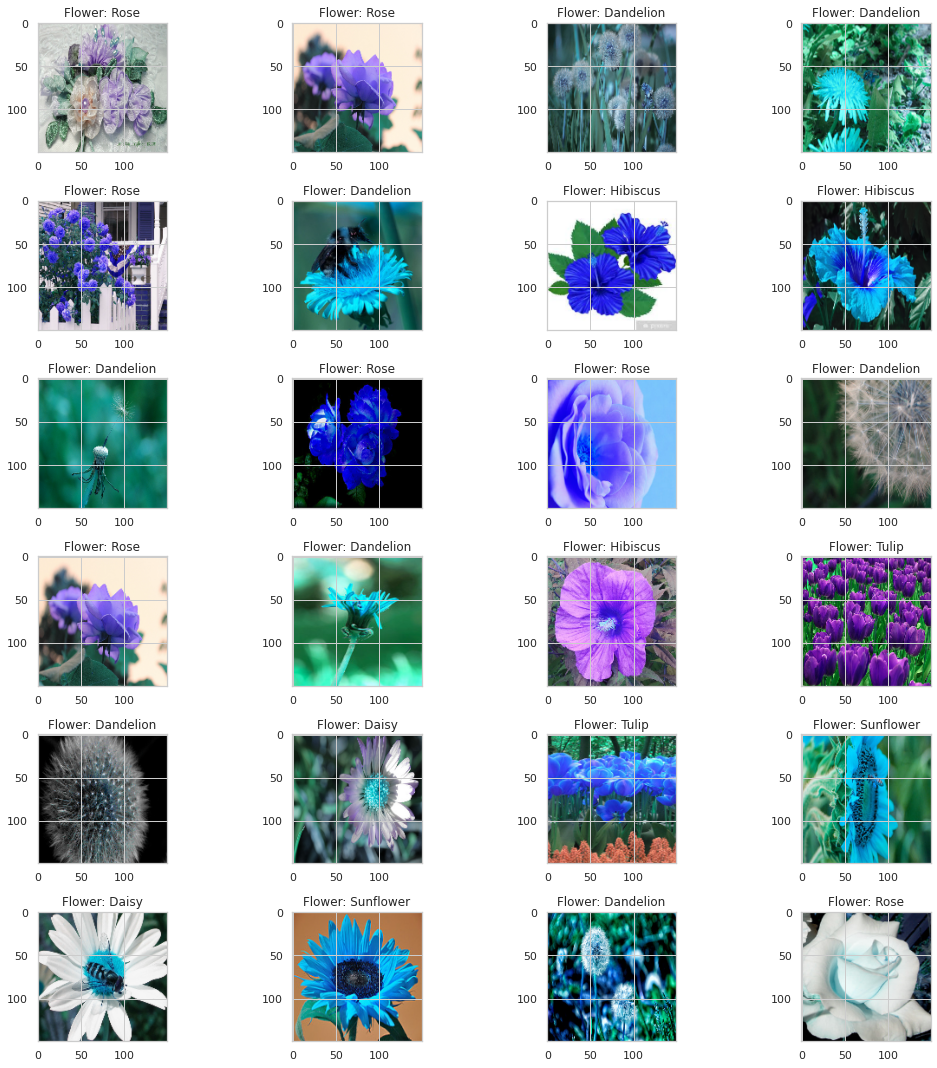

In [ ]:
import random as rn
fig,ax=plt.subplots(6,4)
fig.set_size_inches(15,15)
for i in range(6):
    for j in range (4):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+y[l])
        
plt.tight_layout()

SPLIT & TRAIN

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder=LabelEncoder()
y=labelEncoder.fit_transform(y)
y=to_categorical(y,6)
X=np.array(X)
X=X/255

In [ ]:
#ratio train:test = 0.75:0.25
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

MODEL

In [ ]:
# # modelling starts using a CNN.
from keras.layers import Activation, Dense

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(6, activation = "softmax"))

In [ ]:
batch_size=128
epochs=60

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

DATA AUGMENTATION

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

COMPILING

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
History = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/60
25/25 [==============================] - 198s 8s/step - loss: 1.6363 - accuracy: 0.3021 - val_loss: 1.2893 - val_accuracy: 0.4239
Epoch 2/60
25/25 [==============================] - 196s 8s/step - loss: 1.2916 - accuracy: 0.4573 - val_loss: 1.1777 - val_accuracy: 0.5308
Epoch 3/60
25/25 [==============================] - 196s 8s/step - loss: 1.1807 - accuracy: 0.5503 - val_loss: 1.1222 - val_accuracy: 0.5888
Epoch 4/60
25/25 [==============================] - 196s 8s/step - loss: 1.0474 - accuracy: 0.6058 - val_loss: 1.0187 - val_accuracy: 0.6087
Epoch 5/60
25/25 [==============================] - 196s 8s/step - loss: 0.9961 - accuracy: 0.6250 - val_loss: 0.9899 - val_accuracy: 0.6359
Epoch 6/60
25/25 [==============================] - 196s 8s/step - loss: 0.9698 - accuracy: 0.6288 - val_loss: 0.9904 - val_accuracy: 0.6250
Epoch 7/60
25/25 [==============================] - 196s 8s/step - loss: 0.8978 - accuracy: 0.6614 - val_loss: 0.9585 - val_accuracy: 0.6513
Epoch 8/60
25

EVALUATING PERFORMANCE

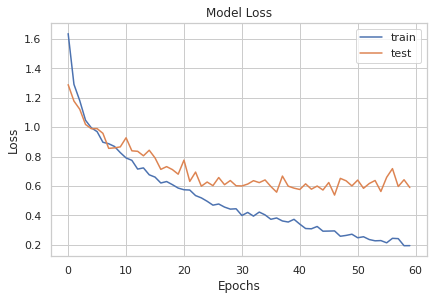

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

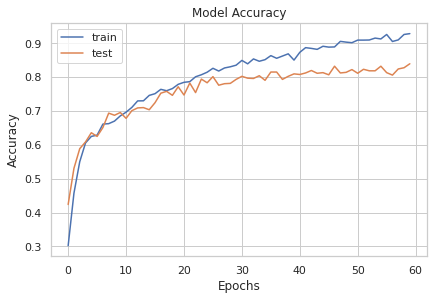

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

PREDICTIONS

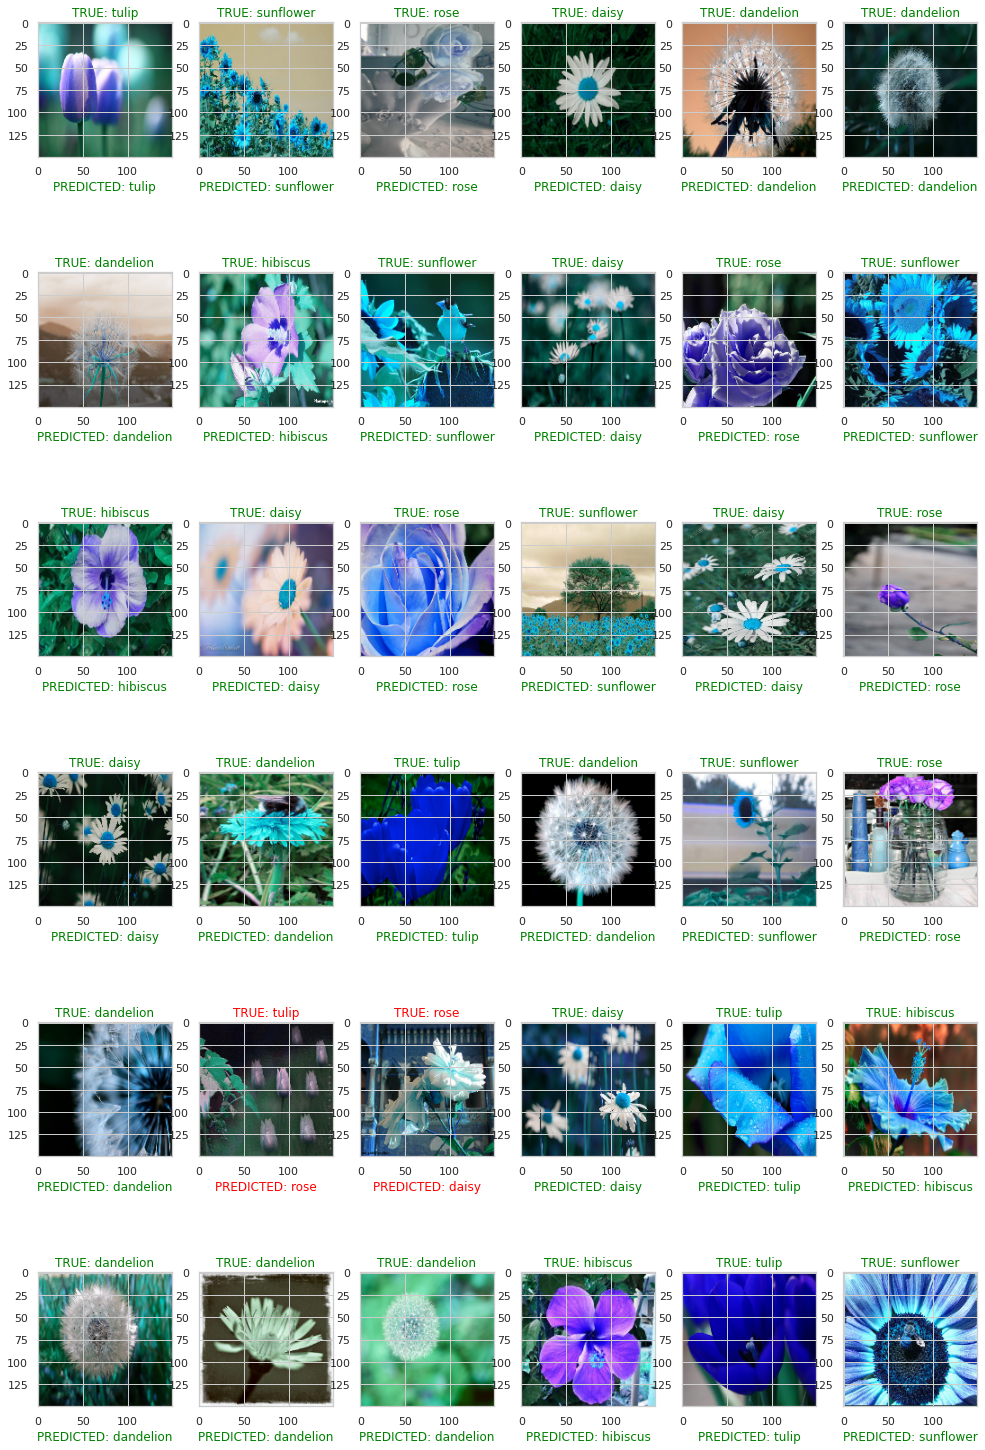

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

categories = np.sort(os.listdir('/content/drive/Shareddrives/Balance Unlimited/Flower Dataset (MalTen)/All'))
fig, ax = plt.subplots(6,6, figsize=(15, 25))

for i in range(6):
    for j in range(6):
        k = int(np() * len(x_test))
        if(categories[np.argmax(y_test[.random.random_samplek])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(IMG_SIZE, IMG_SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(IMG_SIZE, IMG_SIZE, 3), cmap='gray')